In [33]:
import polars as pl
import pybaseball as pb
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import polars.selectors as cs

In [2]:
pb.cache.enable()

In [3]:
pb.playerid_lookup('Skubal', 'Tarik')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,skubal,tarik,669373,skubt001,skubata01,22267,2020.0,2025.0


In [4]:
player_id = 669373  
years = range(2020, 2025)

# Collect yearly data into a list
dfs = []
for y in years:
    print(f"Fetching {y} data...")
    try:
        df_year = pb.statcast_pitcher(f"{y}-01-01", f"{y}-12-31", player_id)
        if not df_year.empty:
            dfs.append(pl.from_pandas(df_year))
    except Exception as e:
        print(f"No data for {y}: {e}")

# Combine all years into one Polars DataFrame
if dfs:
    all_pitches = pl.concat(dfs, how="vertical_relaxed")
    print(f"\n✅ Combined dataset shape: {all_pitches.shape}")
    print("Columns:", all_pitches.columns)
else:
    print("No data found for this player.")
    

Fetching 2020 data...
Gathering Player Data
Fetching 2021 data...
Gathering Player Data
Fetching 2022 data...
Gathering Player Data
Fetching 2023 data...
Gathering Player Data
Fetching 2024 data...
Gathering Player Data

✅ Combined dataset shape: (10196, 118)
Columns: ['pitch_type', 'game_date', 'release_speed', 'release_pos_x', 'release_pos_z', 'player_name', 'batter', 'pitcher', 'events', 'description', 'spin_dir', 'spin_rate_deprecated', 'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des', 'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type', 'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y', 'tfs_deprecated', 'tfs_zulu_deprecated', 'umpire', 'sv_id', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot', 'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed', 'release_spin_rate', 'release_extension', 'g

In [5]:
all_pitches

pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,…,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
str,str,f64,f64,f64,str,i64,i64,str,str,f64,f64,f64,f64,f64,str,str,str,str,str,str,str,f64,str,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,i64,str,…,i64,i64,i64,i64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,f64,f64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""SL""","""2020-09-27""",85.1,2.98,6.29,"""Skubal, Tarik""",521692,669373,"""strikeout""","""called_strike""",null,null,null,null,1.0,"""Salvador Perez called out on s…","""R""","""R""","""L""","""KC""","""DET""","""S""",2.0,null,2,2,2020,-0.17,0.06,-0.49,3.18,null,null,null,2,6,"""Bot""",…,1,2,2,1,"""Infield shift""","""Standard""",206.0,-0.003,-0.25,null,null,null,0.25,null,1,1,0.703192,0.703192,23,30,24,30,2,2,5.0,1.0,null,null,3.09,-0.17,0.17,47.9,null,null,null,null,null
"""FF""","""2020-09-27""",94.4,3.23,6.32,"""Skubal, Tarik""",521692,669373,null,"""ball""",null,null,null,null,12.0,"""Ball""","""R""","""R""","""L""","""KC""","""DET""","""B""",null,null,1,2,2020,1.14,1.65,1.62,2.98,null,null,null,2,6,"""Bot""",…,1,2,2,1,"""Infield shift""","""Standard""",136.0,0.007,0.046,null,null,null,-0.046,null,1,1,0.703192,0.703192,23,30,24,30,2,2,5.0,1.0,null,null,0.94,1.14,-1.14,43.1,null,null,null,null,null
"""FF""","""2020-09-27""",93.6,2.98,6.35,"""Skubal, Tarik""",521692,669373,null,"""foul""",null,null,null,null,12.0,"""Foul""","""R""","""R""","""L""","""KC""","""DET""","""S""",null,null,1,1,2020,1.0,1.34,1.37,2.92,null,null,null,2,6,"""Bot""",…,1,2,2,1,"""Infield shift""","""Standard""",141.0,0.007,-0.075,null,null,null,0.075,null,1,1,0.703192,0.703192,23,30,24,30,2,2,5.0,1.0,null,null,1.29,1.0,-1.0,46.0,null,null,null,null,null
"""FF""","""2020-09-27""",93.1,2.96,6.39,"""Skubal, Tarik""",521692,669373,null,"""swinging_strike""",null,null,null,null,12.0,"""Swinging Strike""","""R""","""R""","""L""","""KC""","""DET""","""S""",null,null,1,0,2020,0.91,1.64,1.44,2.99,null,null,null,2,6,"""Bot""",…,1,2,2,1,"""Infield shift""","""Standard""",140.0,0.007,-0.057,null,null,null,0.057,null,1,1,0.703192,0.703192,23,30,24,30,2,2,5.0,1.0,null,null,1.0,0.91,-0.91,47.6,null,null,null,null,null
"""CU""","""2020-09-27""",76.4,2.71,6.52,"""Skubal, Tarik""",521692,669373,null,"""ball""",null,null,null,null,14.0,"""Ball""","""R""","""R""","""L""","""KC""","""DET""","""B""",null,null,0,0,2020,-0.26,-1.32,0.06,-1.13,null,null,null,2,6,"""Bot""",…,1,2,2,1,"""Infield shift""","""Standard""",339.0,0.007,0.046,null,null,null,-0.046,null,1,1,0.703192,0.703192,23,30,24,30,2,2,5.0,1.0,null,null,5.23,-0.26,0.26,58.0,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""CH""","""2024-02-28""",87.2,1.95,6.27,"""Skubal, Tarik""",669707,669373,null,"""swinging_strike""",null,null,null,null,12.0,"""Swinging Strike""","""S""","""R""","""L""","""PIT""","""DET""","""S""",null,null,0,1,202

In [11]:
# Select float columns and 'pitch_type', drop columns ending with '_deprecated', use walrus operator
(
    all_pitches_features := all_pitches
    .drop([cs.contains('_deprecated')])
    .select([cs.float() | cs.contains('pitch_type')])
)


pitch_type,release_speed,release_pos_x,release_pos_z,spin_dir,zone,hit_location,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,hc_x,hc_y,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_win_exp,bat_win_exp,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""SL""",85.1,2.98,6.29,null,1.0,2.0,-0.17,0.06,-0.49,3.18,null,null,null,null,null,null,null,-7.782973,-123.721016,-1.107625,-0.173032,24.393207,-31.523368,3.55,1.7,null,null,null,84.9,1483.0,6.2,54.35,null,0.0,0.0,1.0,0.0,0.0,null,206.0,-0.003,-0.25,null,null,null,0.25,null,0.703192,0.703192,5.0,1.0,null,null,3.09,-0.17,0.17,47.9,null,null,null,null,null
"""FF""",94.4,3.23,6.32,null,12.0,null,1.14,1.65,1.62,2.98,null,null,null,null,null,null,null,-6.675962,-137.055987,-6.557067,15.899447,33.809779,-10.094797,3.62,1.67,null,null,null,93.3,2385.0,6.0,54.49,null,null,null,null,null,null,null,136.0,0.007,0.046,null,null,null,-0.046,null,0.703192,0.703192,5.0,1.0,null,null,0.94,1.14,-1.14,43.1,null,null,null,null,null
"""FF""",93.6,2.98,6.35,null,12.0,null,1.0,1.34,1.37,2.92,null,null,null,null,null,null,null,-6.308548,-136.007089,-5.991313,13.823252,32.572721,-14.435085,3.49,1.6,null,null,null,92.8,2251.0,6.1,54.39,null,null,null,null,null,null,null,141.0,0.007,-0.075,null,null,null,0.075,null,0.703192,0.703192,5.0,1.0,null,null,1.29,1.0,-1.0,46.0,null,null,null,null,null
"""FF""",93.1,2.96,6.39,null,12.0,null,0.91,1.64,1.44,2.99,null,null,null,null,null,null,null,-5.88301,-135.353033,-6.501201,12.509075,30.776896,-10.758048,3.49,1.6,null,null,null,92.6,2279.0,6.1,54.39,null,null,null,null,null,null,null,140.0,0.007,-0.057,null,null,null,0.057,null,0.703192,0.703192,5.0,1.0,null,null,1.0,0.91,-0.91,47.6,null,null,null,null,null
"""CU""",76.4,2.71,6.52,null,14.0,null,-0.26,-1.32,0.06,-1.13,null,null,null,null,null,null,null,-5.115604,-111.105537,-6.662703,-1.18712,20.428366,-42.032835,3.53,1.7,null,null,null,76.1,2287.0,6.2,54.34,null,null,null,null,null,null,null,339.0,0.007,0.046,null,null,null,-0.046,null,0.703192,0.703192,5.0,1.0,null,null,5.23,-0.26,0.26,58.0,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""CH""",87.2,1.95,6.27,null,12.0,null,1.57,0.31,1.43,2.55,null,null,null,null,null,null,null,-4.44251,-126.849967,-3.350093,17.798574,28.336073,-28.300601,3.34,1.69,null,null,null,86.5,1783.0,6.0,54.45,null,null,null,null,null,null,null,129.0,0.0,-0.057,null,null,null,0.057,null,0.526281,0.526281,null,null,null,null,2.71,1.57,-1.57,null,null,null,null,null,null
"""SL""",88.6,1.77,6.39,null,9.0,null,-0.32,0.68,0.61,1.98,null,null,null,null,null,null,null,-2.143077,-128.905103,-6.079235,-3.102935,27.585904,-23.527443,3.34,1.69,null,null,null,88.2,2163.0,6.1,54.38,null,null,null,null,null,null,null,180.0,0.0,-0.037,null,null,null,0.037,null,0.526281,0.526281,null,null,null,null,2.23,-0.32,0.32,null,null,null,null,null,null
"""SL""",88.0,1.71,6.23,null,8.0,6.0,-0.23,0.38,0.0,1.77,null,null,null,111.94,154.67,null,null,-3.667728,-128.067778,-5.481355,-1.733463,27.432075,-27.033361,3.08,1.55,13.0,96.7,-7.0,87

In [56]:
# unwanted cols
exclude_cols = [
    'spin_dir', 'hit_location', 'on_3b', 'on_2b', 'on_1b', 'hc_x', 'hc_y', 'umpire', 'sv_id',
    'hit_distance_sc', 'launch_speed', 'launch_angle', 'estimated_ba_using_speedangle',
    'estimated_woba_using_speedangle', 'woba_value', 'woba_denom', 'babip_value', 'iso_value',
    'launch_speed_angle', 'bat_speed', 'swing_length', 'estimated_slg_using_speedangle',
    'hyper_speed', 'pitcher_days_since_prev_game', 'batter_days_since_prev_game',
    'pitcher_days_until_next_game', 'batter_days_until_next_game', 'arm_angle', 'attack_angle',
    'attack_direction', 'swing_path_tilt', 'intercept_ball_minus_batter_pos_x_inches',
    'intercept_ball_minus_batter_pos_y_inches'
]

# get cols of interest
cols = all_pitches_features.columns
columns_of_interest = [col for col in cols if col not in exclude_cols]

# features data frame
(Skubal_Features_only := all_pitches_features
 .select(columns_of_interest)
 .drop(pl.col('pitch_type'))
 ).describe()


statistic,release_speed,release_pos_x,release_pos_z,zone,pfx_x,pfx_z,plate_x,plate_z,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,effective_speed,release_spin_rate,release_extension,release_pos_y,spin_axis,delta_home_win_exp,delta_run_exp,delta_pitcher_run_exp,home_win_exp,bat_win_exp,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",10108.0,10108.0,10108.0,10108.0,10108.0,10108.0,10108.0,10108.0,10108.0,10108.0,10108.0,10108.0,10108.0,10108.0,10108.0,10108.0,10075.0,10075.0,10084.0,10108.0,10075.0,10196.0,10189.0,10189.0,10196.0,10196.0,10108.0,10108.0,10108.0
"""null_count""",88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,121.0,121.0,112.0,88.0,121.0,0.0,7.0,7.0,0.0,0.0,88.0,88.0,88.0
"""mean""",90.5389,2.262148,6.254302,8.503166,0.589915,0.83403,0.030318,2.437067,-6.84438,-131.602888,-5.344453,8.684873,27.682663,-20.734403,3.376449,1.57878,90.452655,2050.978065,6.271103,54.229093,158.62134,-0.00071,-0.007386,0.007386,0.522035,0.494369,1.990785,0.589915,-0.404426
"""std""",6.049874,0.592224,0.184111,4.234948,0.592228,0.606777,0.743515,0.984075,2.480778,8.75184,2.583311,7.036048,4.200542,7.596929,0.171155,0.098166,6.079743,274.885456,0.155764,0.153466,49.326167,0.023173,0.217959,0.217959,0.215276,0.216328,0.979657,0.592228,0.731568
"""min""",69.7,1.01,5.7,1.0,-1.25,-1.64,-3.15,-2.39,-16.141672,-147.981375,-15.860797,-8.997876,14.700635,-45.158173,2.64,1.14,68.6,81.0,5.1,52.88,1.0,-0.267,-0.51,-2.679,0.000128,0.000128,0.67,-1.25,-1.8
"""25%""",86.2,1.74,6.12,5.0,0.06,0.51,-0.46,1.82,-8.53654,-138.644498,-7.060047,2.039856,24.358485,-25.975698,3.27,1.51,86.2,1988.0,6.2,54.13,139.0,-0.008,-0.063,-0.038,0.382575,0.355129,1.23,0.06,-0.98
"""50%""",92.8,2.15,6.25,9.0,0.67,0.96,0.04,2.47,-6.80684,-134.750225,-5.49995,9.898647,27.963483,-19.427495,3.38,1.58,92.4,2119.0,6.3,54.24,145.0,0.0,-0.038,0.038,0.526281,0.510302,1.66,0.67,-0.56
"""75%""",95.4,2.79,6.38,12.0,1.09,1.3,0.53,3.1,-5.134215,-125.311366,-3.825893,14.08661,30.917937,-14.309039,3.49,1.64,95.3,2217.0,6.4,54.33,152.0,0.006,0.038,0.063,0.655888,0.636091,2.54,1.09,0.11
"""max""",101.7,3.66,6.95,14.0,1.8,1.9,2.71,5.88,1.007274,-101.027454,7.368898,25.944555,57.667987,-6.269972,4.14,1.98,101.5,3411.0,7.6,55.43,359.0,0.28,2.679,0.51,0.999843,0.999843,6.22,1.8,1.72


In [58]:
Skubal_Features_only.drop_nulls()
# only 131 nulls, just going to leave those out for analysis.

release_speed,release_pos_x,release_pos_z,zone,pfx_x,pfx_z,plate_x,plate_z,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,effective_speed,release_spin_rate,release_extension,release_pos_y,spin_axis,delta_home_win_exp,delta_run_exp,delta_pitcher_run_exp,home_win_exp,bat_win_exp,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
85.1,2.98,6.29,1.0,-0.17,0.06,-0.49,3.18,-7.782973,-123.721016,-1.107625,-0.173032,24.393207,-31.523368,3.55,1.7,84.9,1483.0,6.2,54.35,206.0,-0.003,-0.25,0.25,0.703192,0.703192,3.09,-0.17,0.17
94.4,3.23,6.32,12.0,1.14,1.65,1.62,2.98,-6.675962,-137.055987,-6.557067,15.899447,33.809779,-10.094797,3.62,1.67,93.3,2385.0,6.0,54.49,136.0,0.007,0.046,-0.046,0.703192,0.703192,0.94,1.14,-1.14
93.6,2.98,6.35,12.0,1.0,1.34,1.37,2.92,-6.308548,-136.007089,-5.991313,13.823252,32.572721,-14.435085,3.49,1.6,92.8,2251.0,6.1,54.39,141.0,0.007,-0.075,0.075,0.703192,0.703192,1.29,1.0,-1.0
93.1,2.96,6.39,12.0,0.91,1.64,1.44,2.99,-5.88301,-135.353033,-6.501201,12.509075,30.776896,-10.758048,3.49,1.6,92.6,2279.0,6.1,54.39,140.0,0.007,-0.057,0.057,0.703192,0.703192,1.0,0.91,-0.91
76.4,2.71,6.52,14.0,-0.26,-1.32,0.06,-1.13,-5.115604,-111.105537,-6.662703,-1.18712,20.428366,-42.032835,3.53,1.7,76.1,2287.0,6.2,54.34,339.0,0.007,0.046,-0.046,0.703192,0.703192,5.23,-0.26,0.26
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
87.2,1.95,6.27,12.0,1.57,0.31,1.43,2.55,-4.44251,-126.849967,-3.350093,17.798574,28.336073,-28.300601,3.34,1.69,86.5,1783.0,6.0,54.45,129.0,0.0,-0.057,0.057,0.526281,0.526281,2.71,1.57,-1.57
88.6,1.77,6.39,9.0,-0.32,0.68,0.61,1.98,-2.143077,-128.905103,-6.079235,-3.102935,27.585904,-23.527443,3.34,1.69,88.2,2163.0,6.1,54.38,180.0,0.0,-0.037,0.037,0.526281,0.526281,2.23,-0.32,0.32
88.0,1.71,6.23,8.0,-0.23,0.38,0.0,1.77,-3.667728,-128.067778,-5.481355,-1.733463,27.432075,-27.033361,3.08,1.55,87.7,2109.0,6.2,54.29,189.0,-0.022,-0.163,0.163,0.548109,0.548109,2.57,-0.23,0.23


### Transform the Data (Standardize)

In [34]:
scaler = StandardScaler()

In [53]:
Skubal_Features_Transformed = scaler.fit_transform(Skubal_Features_only)

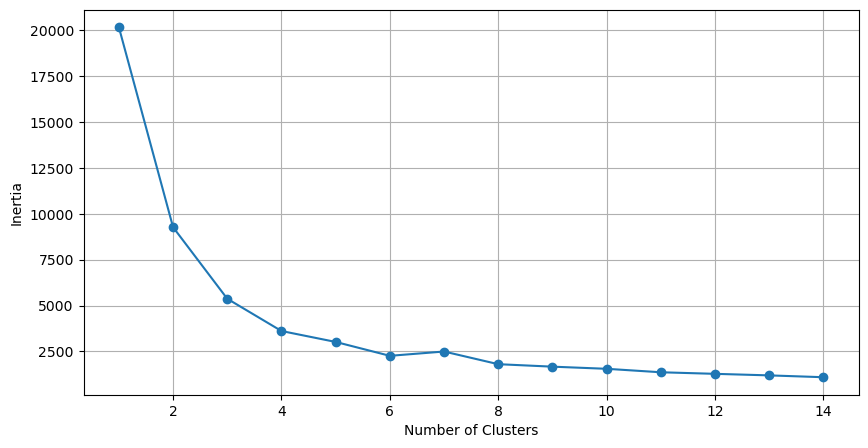

In [59]:
import matplotlib.pyplot as plt

# Create function to work out optimum number of clusters (elbow method)
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
    # Generate the elbow plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(means, inertias, 'o-')
    ax.set_xlabel('Number of Clusters')
    ax.set_ylabel('Inertia')
    ax.grid(True)
    plt.show()

# Get indices for the columns of interest
colnames = Skubal_Features_only.columns
idx_release_speed = colnames.index('release_speed')
idx_release_spin_rate = colnames.index('release_spin_rate')

# Select only those columns from the transformed array
selected_features = Skubal_Features_Transformed[:, [idx_release_speed, idx_release_spin_rate]]

# Remove rows with NaN values
import numpy as np
selected_features_no_nan = selected_features[~np.isnan(selected_features).any(axis=1)]

optimise_k_means(selected_features_no_nan, 15)